당뇨 데이터 활용한 예측

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = np.loadtxt("data-03-diabetes.csv", delimiter=',', dtype=np.float32)
x_data = data[:,0:-1]
y_data = data[:,[-1]]

In [12]:
W = tf.Variable(tf.random.normal([8, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='weight')


In [13]:
def hypothesis(W, b):
    return tf.sigmoid(tf.matmul(x_data, W) + b)

In [14]:
def cost(W, b):
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(W, b)) + 
                           (1 - y_data) * tf.math.log(1 - hypothesis(W, b)))

In [15]:
def graph():
    import matplotlib as mpl
    mpl.rc('font', family='NanumGothic') # 한글 설정
    mpl.rc('axes', unicode_minus=False)  # 음수부호 설정

    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()   # x축을 공유하는 두개의 y축
    ax0.set_title("학습 회수에 따른 오차(cost)와 accuracy변화")
    ax0.plot(cost_arr, 'r-', label="y0")
    ax0.set_ylabel("y0")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="y1")
    ax1.set_ylabel("y1")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()


In [16]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

epoch_arr = []
cost_arr = []
accuracy_arr= []

In [17]:
for i in range(10001):  # epochs를 바꿔가며 accuracy 변화 체크
    with tf.GradientTape() as tape:
        cost_value = cost(W, b)
    grads = tape.gradient(cost_value, [W, b])
    opt.apply_gradients(zip(grads, [W, b]))
  
    predicted = tf.cast(hypothesis(W, b) > 0.5, dtype=tf.float32)
    epoch_arr.append(i)
    cost_arr.append(cost_value.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)

    if i % 200 == 0:
        print(f'epochs={i}, cost={cost_value.numpy()}, W1={W.numpy()[0,0]}, W2={W.numpy()[1,0]}, ... ,b={b.numpy()}')
    

epochs=0, cost=0.6249620914459229, W1=-0.35850077867507935, W2=-0.736665666103363, ... ,b=[0.41652003]
epochs=200, cost=0.5734624266624451, W1=-0.323588490486145, W2=-0.8847116231918335, ... ,b=[0.20930487]
epochs=400, cost=0.5557312369346619, W1=-0.3280479907989502, W2=-1.0011919736862183, ... ,b=[0.10619146]
epochs=600, cost=0.546320915222168, W1=-0.3501077890396118, W2=-1.0999958515167236, ... ,b=[0.0543889]
epochs=800, cost=0.5392381548881531, W1=-0.3781889081001282, W2=-1.1884679794311523, ... ,b=[0.02591557]
epochs=1000, cost=0.5332409739494324, W1=-0.4072689116001129, W2=-1.2700661420822144, ... ,b=[0.00819954]
epochs=1200, cost=0.5280098915100098, W1=-0.4353843927383423, W2=-1.3464510440826416, ... ,b=[-0.00415517]
epochs=1400, cost=0.5234043002128601, W1=-0.4618555009365082, W2=-1.418495535850525, ... ,b=[-0.01348368]
epochs=1600, cost=0.5193284153938293, W1=-0.48651769757270813, W2=-1.4867342710494995, ... ,b=[-0.02084471]
epochs=1800, cost=0.5157060027122498, W1=-0.509404659

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pyl

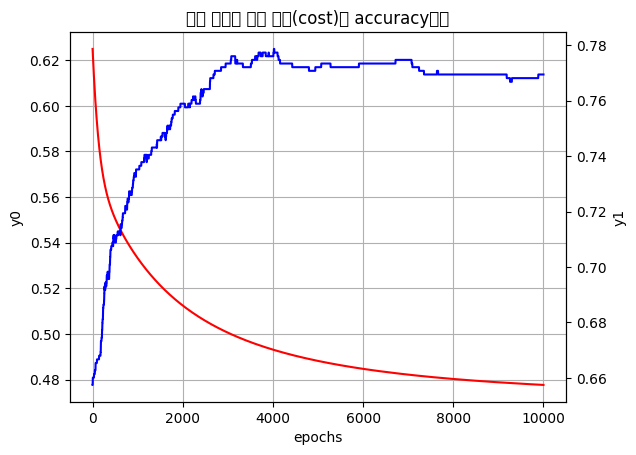

In [18]:
graph()

In [21]:
print("W = ", W.numpy())
print("b = ", b.numpy()[0])

predicted = tf.cast(hypothesis(W, b) > 0.5, dtype=tf.float64)
accuracy = np.mean(y_data == predicted)

print("Accuracy =", accuracy)

W =  [[-0.8206233 ]
 [-2.8547194 ]
 [-0.18509379]
 [-0.53013015]
 [-0.35972548]
 [-1.7057407 ]
 [-1.0612261 ]
 [-0.12824702]]
b =  0.027787456
Accuracy = 0.769433465085639
